
### Importing Required python packages

In [52]:
# -*- coding: utf-8 -*-
"""
Created on Sun May  3 22:40:11 2020

@author: KSR
"""

import pandas as pd
from pandas.io.json import json_normalize
import seaborn as sns
import matplotlib.pyplot as plt
import json ,requests 
from bs4 import BeautifulSoup 
import geopandas as gpd
from prettytable import PrettyTable
import folium
from geopy.geocoders import Nominatim

### Importing required data

In [6]:
#input data
# offical ministry of health website
url = 'https://www.mohfw.gov.in/' 

# make a GET request to fetch the raw HTML content
web_content = requests.get(url).content
map_data = gpd.read_file('Indian_States.shp')

### Preprocessing Data

In [8]:

# parse the html content
soup = BeautifulSoup(web_content, "html.parser")

# remove any newlines and extra spaces from left and right
extract_contents = lambda row: [x.text.replace('\n', '') for x in row] 

stats = [] # initialize stats
all_rows = soup.find_all('tr') # find all table rows 

for row in all_rows: 
    stat = extract_contents(row.find_all('td')) # find all data cells  
    # notice that the data that we require is now a list of length 5
    if len(stat) == 5: 
        stats.append(stat)

# now convert the data into a pandas dataframe for further processing
new_cols = ["Sr.No", "States/UT","Confirmed","Recovered","Deceased"]
state_data = pd.DataFrame(data = stats, columns = new_cols)

# converting the 'string' data to 'int'
state_data['Confirmed'] = state_data['Confirmed'].map(int)
state_data['Recovered'] = state_data['Recovered'].map(int)
state_data['Deceased']  = state_data['Deceased'].map(int)



### Visualization and Analytics

###  Number of Confirmed ,Recovered and Deceased Table

In [10]:
# pretty table representation
table = PrettyTable()
table.field_names = (new_cols)
for i in stats:
    table.add_row(i)
table.add_row(["","Total", 
               sum(state_data['Confirmed']), 
               sum(state_data['Recovered']), 
               sum(state_data['Deceased'])])
print(table)



+-------+-----------------------------+-----------+-----------+----------+
| Sr.No |          States/UT          | Confirmed | Recovered | Deceased |
+-------+-----------------------------+-----------+-----------+----------+
|   1   | Andaman and Nicobar Islands |     33    |     17    |    0     |
|   2   |        Andhra Pradesh       |    1583   |    488    |    33    |
|   3   |      Arunachal Pradesh      |     1     |     1     |    0     |
|   4   |            Assam            |     43    |     32    |    1     |
|   5   |            Bihar            |    482    |    117    |    4     |
|   6   |          Chandigarh         |     94    |     19    |    0     |
|   7   |         Chhattisgarh        |     43    |     36    |    0     |
|   8   |            Delhi            |    4122   |    1256   |    64    |
|   9   |             Goa             |     7     |     7     |    0     |
|   10  |           Gujarat           |    5055   |    896    |   262    |
|   11  |           Harya

### State wise count of Confirmed Cases

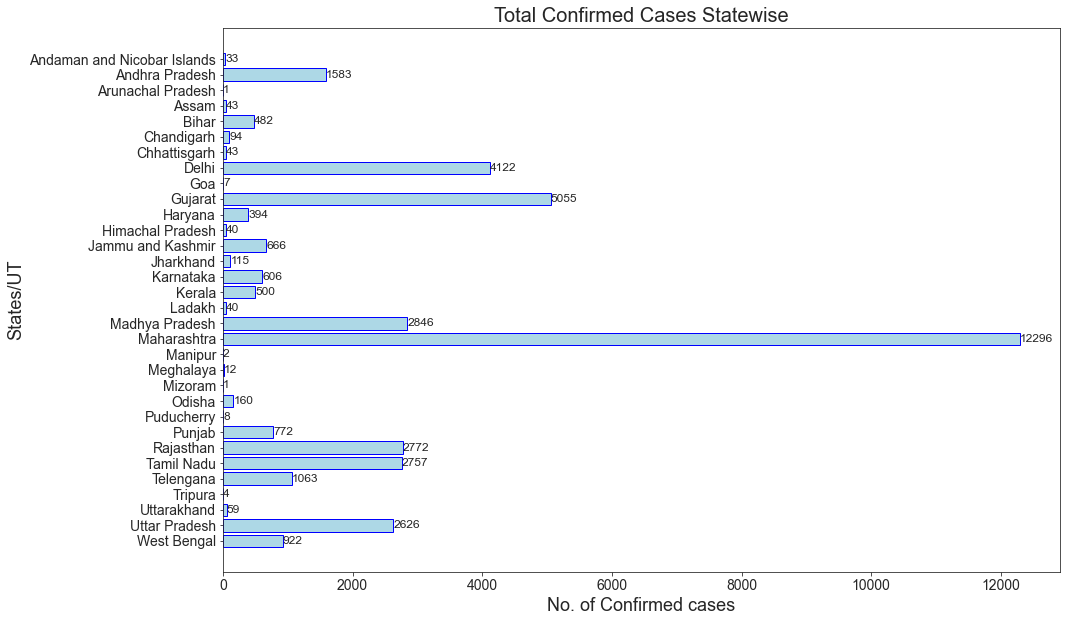

In [11]:
# barplot to show total confirmed cases Statewise 
sns.set_style("ticks")
plt.figure(figsize = (15,10))
plt.barh(state_data["States/UT"], state_data["Confirmed"].map(int),
         align = 'center', color = 'lightblue', edgecolor = 'blue')
plt.xlabel('No. of Confirmed cases', fontsize = 18)
plt.ylabel('States/UT', fontsize = 18)
plt.gca().invert_yaxis() # this is to maintain the order in which the states appear
plt.xticks(fontsize = 14) 
plt.yticks(fontsize = 14)
plt.title('Total Confirmed Cases Statewise', fontsize = 20)

for index, value in enumerate(state_data["Confirmed"]):
    plt.text(value, index, str(value), fontsize = 12, verticalalignment = 'center')
plt.show()  



###  Chart to show Number of Confirmed ,Recovered and Deceased 

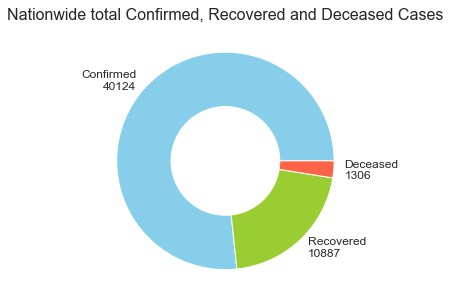

In [12]:
# donut chart representing nationwide total confirmed, cured and deceased cases
group_size = [sum(state_data['Confirmed']), 
              sum(state_data['Recovered']), 
              sum(state_data['Deceased'])]

group_labels = ['Confirmed\n' + str(sum(state_data['Confirmed'])), 
                'Recovered\n' + str(sum(state_data['Recovered'])), 
                'Deceased\n'  + str(sum(state_data['Deceased']))]
custom_colors = ['skyblue','yellowgreen','tomato']

plt.figure(figsize = (5,5))
plt.pie(group_size, labels = group_labels, colors = custom_colors)
central_circle = plt.Circle((0,0), 0.5, color = 'white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size = 12) 
plt.title('Nationwide total Confirmed, Recovered and Deceased Cases', fontsize = 16)
plt.show()



### Color coding states based on corona count ( classification )

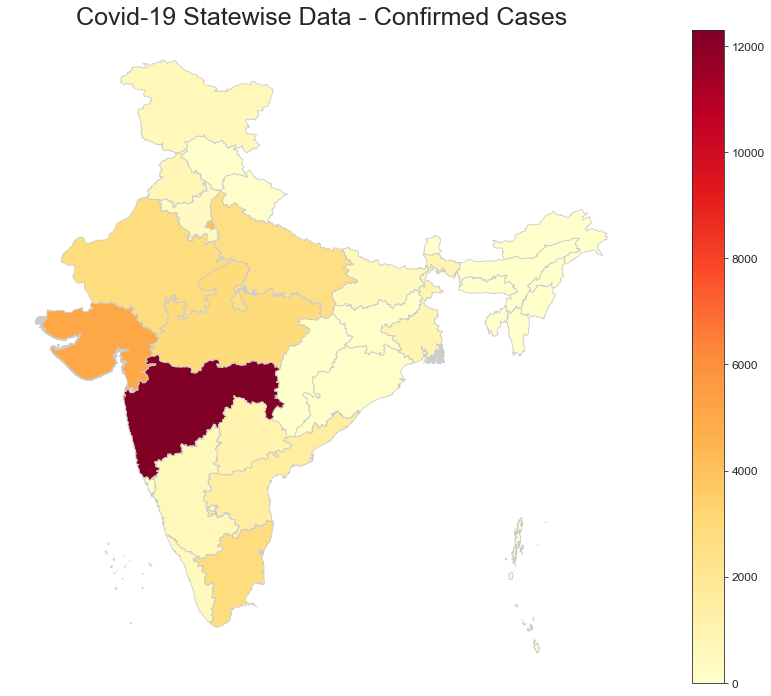

In [14]:
# show state wise shapefile of India in a GeoDataFrame and preview it

map_data.rename(columns = {'st_nm':'States/UT'}, inplace = True)
map_data.head()

# correct the name of states in the map dataframe 
map_data['States/UT'] = map_data['States/UT'].str.replace('&', 'and')
map_data['States/UT'].replace('Arunanchal Pradesh', 'Arunachal Pradesh', inplace = True)
map_data['States/UT'].replace('Telangana', 'Telengana', inplace = True)
map_data['States/UT'].replace('NCT of Delhi', 'Delhi', inplace = True)

# merge both the dataframes - state_data and map_data
merged_data = pd.merge(map_data, state_data, how = 'left', on = 'States/UT')
merged_data.fillna(0, inplace = True)
merged_data.drop('Sr.No', axis = 1, inplace = True)
merged_data.head()

# create figure and axes for Matplotlib and set the title
fig, ax = plt.subplots(1, figsize=(20, 12))
ax.axis('off')
ax.set_title('Covid-19 Statewise Data - Confirmed Cases', fontdict = {'fontsize': '25', 'fontweight' : '3'})
# plot the figure
merged_data.plot(column = 'Confirmed', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend = True)
plt.show()

### Implementing Four square to find Pharmacy in the required given city

importing dataset about city name latitude and longitude

In [35]:
citydb=pd.read_csv("in.csv")
citydb

,city,lat,lng,country,iso2,admin,capital,population,population_proper
0,Mumbai,18.987807,72.836447,India,IN,Mahārāshtra,admin,18978000.0,12691836.0
1,Delhi,28.651952,77.231495,India,IN,Delhi,admin,15926000.0,7633213.0
2,Kolkata,22.562627,88.363044,India,IN,West Bengal,admin,14787000.0,4631392.0
3,Chennai,13.084622,80.248357,India,IN,Tamil Nādu,admin,7163000.0,4328063.0
4,Bengalūru,12.977063,77.587106,India,IN,Karnātaka,admin,6787000.0,5104047.0
...,...,...,...,...,...,...,...,...,...
207,Calicut,11.248016,75.780402,India,IN,Kerala,minor,NaN,NaN
208,Kagaznāgār,19.331589,79.466051,India,IN,Andhra Pradesh,minor,NaN,NaN
209,Jaipur,26.913312,75.787872,India,IN,Rājasthān,admin,NaN,NaN
210,Ghandinagar,23.216667,72.683333,India,IN,Gujarāt,admin,NaN,NaN


Give the required city name 

In [38]:
#give city name  where we neeed to if any drug store (phramacy is opened)
cityname="Chennai" 
requiredcitygeo= citydb.loc[citydb['city'] == cityname]
requiredcitygeo


,city,lat,lng,country,iso2,admin,capital,population,population_proper
3,Chennai,13.084622,80.248357,India,IN,Tamil Nādu,admin,7163000.0,4328063.0


Get the longitude and latitude from city dataset 

In [ ]:
clatitude=requiredcitygeo['lat']
clongitude=requiredcitygeo['lng']


In [ ]:
### CONFIGURING FOURSQUARE and fetiching data (phramacy)

In [46]:
CLIENT_ID = 'CQ'
CLIENT_SECRET = 'NNZQ3'
radius=100000
VERSION=20180323
query='drugstore'

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&query={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    clatitude,
    clongitude,
    radius,
    query) 
#I dint use limit cos the business suition is during lockdown and so only few  medicalshops are opened in the required city and I require all the shops. 
resp = requests.get(url=url, params=params)
data = json.loads(resp.text)
print(data)

{'meta': {'code': 200, 'requestId': '5eaf35490cc1fd001b411a02'}, 'response': {'headerLocation': 'Chennai', 'headerFullLocation': 'Chennai', 'headerLocationGranularity': 'city', 'query': 'drugstore', 'totalResults': 4, 'suggestedBounds': {'ne': {'lat': 13.967439900000901, 'lng': 81.15981825163458}, 'sw': {'lat': 12.1674380999991, 'lng': 79.31541574836542}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4ef87960469012b8c1cbebda', 'name': 'Health & Glow', 'contact': {}, 'location': {'lat': 13.058719380991459, 'lng': 80.26432434107423, 'labeledLatLngs': [{'label': 'display', 'lat': 13.058719380991459, 'lng': 80.26432434107423}], 'distance': 3054, 'cc': 'IN', 'country': 'India', 'formattedAddress': ['India']}, 'categories': [{'id': '4bf58dd8d48988d10f951735', 'name': 'Pharmacy', 'pluralName': 'Pharmacies', 'shortN

Preproceeing adn formating the json data from foursquare

In [47]:
venues = data['response']['groups'][0]['items']
nearby_venues = json_normalize(venues)

<ipython-input-47-898f6c1f1e8a>:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  nearby_venues = json_normalize(venues)


In [48]:
# filter columns
filtered_columns = ['venue.name', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]
nearby_venues.head()

,name,lat,lng
0,Health & Glow,13.058719,80.264324
1,Bharat Scans,13.054208,80.262729
2,Apollo Pharmacy,13.035061,80.254992
3,Dhanvantari Pharmacy,12.989683,80.256768


In [ ]:
### creating city map to fine the phramcy opened using foursquare data

In [60]:
venues_map = folium.Map(location=[clatitude, clongitude], zoom_start=15)
for lat, lng, label in zip(nearby_venues.lat, nearby_venues.lng,nearby_venues.name):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)
venues_map